# **Veri Ön İşleme**

* Makine öğrenmesi modelleri öncesinde veri seti üzerinde gerçekleştirilmesi gereken bazı işlemleri ve dönüşümleri ifade eder.
* Veri manipülasyonu araçtır.

**Veri Temizleme (Data Cleasing / Cleaning)**

* Gürültülü Veri (Noisy Data): Birbiriyle çelişen verilerdir. Örneğin bir veri setindeki erkek cinsiyetli bir bireyin aynı zamanda hamile olduğunun ya da bir bebek biberonunun $1m olması ifadesi bir gürültülü veridir. 
* Eksik Veri Analizi (Missing Data Analysis): NaN
* Aykırı Gözlem Analizi (Outlier Analysis):

**Veri Standardizasyonu (Data Standardization, Feature Scaling)**

* 0-1 Dönüşümü (Normalization)
* z-skoruna Dönüştürme (Standardization)
* Logaritmik Dönüşüm (Log Transformation)

**Veri İndirgeme (Data Reduction)**

* Gözlem (Observation) Sayısının Azaltılması
* Değişken (Variable) Sayısının Azaltılması

**Değişken Dönüşümleri (Variable Transformation)**

* Sürekli değişkenlerde dönüşümler
* Kategorik değişkenlerde dönüşümler

### **Aykırı Gözlem**

* Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere **_aykırı gözlem_** denir.
* Aykırılığı ifade eden nümerik değere **_aykırı değer_** denir.
* Aykırı değeri barındıran gözlemlere **_aykırı gözlem_** denir.

**_Genellenebilirlik_** kaygısıyla oluşturulan **kural setlerini** ya da **fonksiyonları** yanıltır. **Yanlılığa** sebep olur.

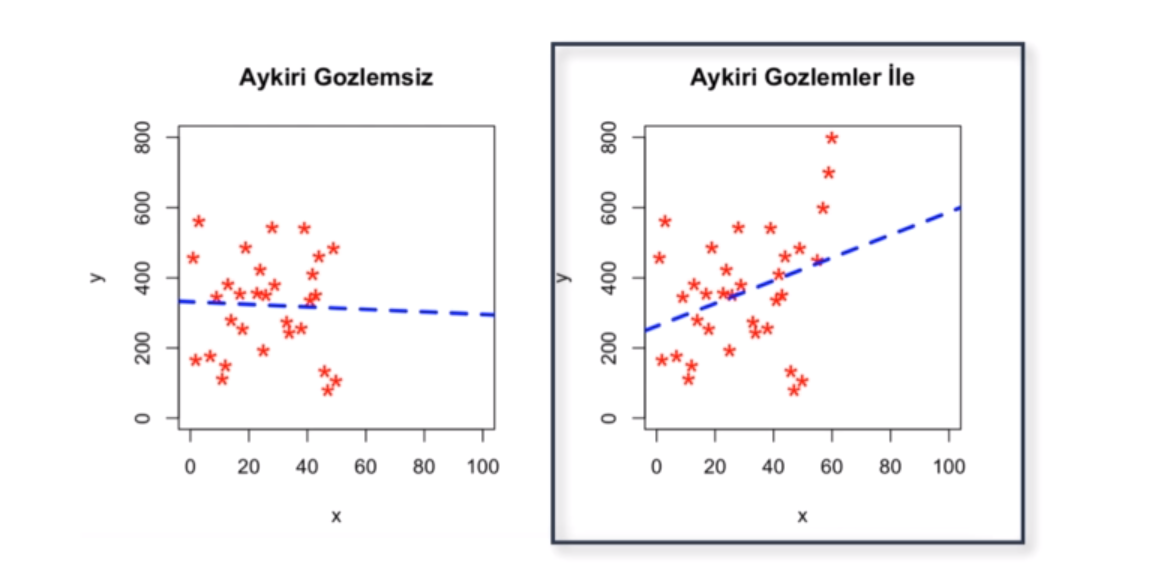

### **Neye Göre Kime Göre Aykırı Gözlem?**

**Amaç genellenebilir, yansız, modeller oluşturmaktır.**

**1.Sektör Bilgisi:** Örneğin bir ev fiyat tahmin modelinde 1000 metrekarelik evleri modellemeye almamak.

**2.Standart Sapma Yaklaşımı:** Bir değişkenin ortalamasının üzerine aynı değişkenin standart sapması hesaplanarak eklenir. 1 2 ya da 3 standart sapma değeri ortalama üzerine eklenerek ortaya çıkan bu değer eşik değer olarak düşünülür ve bu değerden yukarıda ya da aşağıda olan değerler aykırı değer olarak tanımlanır.

        (Eşik Değer = Ortalama + 1 x Standart Sapma)

**3.Z-Skoru Yaklaşımı:** Standart sapma yönetimine benzer olarak çalışır. Değişken normal dağılıma uyarlanır yani standartlaştırılır. Sonrasında -örneğin- dağılımın sağından ve solundan -+ 2,5 değerine göre bir eşik değer konulur ve bu değerin üzerinden ya da altında olan değerler aykırı değer olarak işaretlenir.

**4.Boxplot (Interquartile range - IQR) Yöntemi:** En sık kullanılan yöntemlereden birisidir. Değişkenin değerleri küçükten büyüğe sıralanır. Çeyrekliklerine (yüzdeliklerine) yani Q1,Q3 değerlerine karşılık değerler üzerinden bir eşik değer hesaplanır ve bu eşik değere göre aykırı değer tanımı yapılır.

### **Aykırı Değerleri Yakalamak**

In [3]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64',"int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

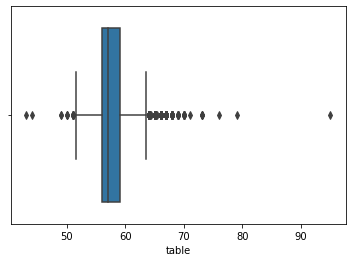

In [5]:
sns.boxplot(x = df_table)

In [8]:
Q1 = df_table.quantile(0.25)  # küçükten büyüğe sıralandığında 
#0.25'ine denk gelen değer
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [9]:
Q1

56.0

In [10]:
Q3

59.0

In [11]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [12]:
alt_sinir

51.5

In [13]:
ust_sinir

63.5

In [14]:
((df_table < alt_sinir)) | ((df_table > ust_sinir))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [15]:
aykiri_tf = (df_table < alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [16]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [17]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

### **Aykırı Değer Problemini Çözmek**

In [18]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

### Silme

In [20]:
import pandas as pd
df_table = pd.DataFrame(df_table)

In [29]:
df_table.shape

(53940, 1)

In [28]:
t_df = df_table[~((df_table<alt_sinir)|(df_table>ust_sinir)).any(axis=1)] 
# ~ sağ tarafındaki koşulun dışındakileri getirmek için kullanıldı

In [27]:
t_df.head()

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0


In [30]:
t_df.shape

(53335, 1)

### Ortalama İle Doldurma

In [31]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64',"int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [32]:
df_table = df["table"]

In [33]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [35]:
df_table.mean()

57.45718390804603

In [36]:
df_table[aykiri_tf] = df_table.mean()

C:\Users\Emre Uslu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### Baskılama Yöntemi

Aykırı değer üst taraftaysa üst sınıra, alt taraftaysa alt sınıra eşitlenir. Sınırlara doğru baskılanır.

In [41]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64',"int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [42]:
df_table = df["table"]
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [43]:
alt_sinir

51.5

In [44]:
df_table[aykiri_tf] = alt_sinir

C:\Users\Emre Uslu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## **Çok Değişkenli Aykırı Gözlem Analizi**

### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

### Silme Yöntemi

In [45]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include=["float64","int64"])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [46]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [47]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [48]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [49]:
df_scores = clf.negative_outlier_factor_

In [51]:
df_scores[:10]    #yoğunluk skorları

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [55]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [56]:
esik_deger = np.sort(df_scores)[13]   
# 13. değeri eşik değer kabul ettik.

In [57]:
aykiri_tf = df_scores > esik_deger
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [60]:
yeni_df = df[df_scores > esik_deger]
yeni_df  # aykırı olmayan değerler elde edildi

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Baskılama Yöntemi

In [61]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [62]:
baski_degeri = df[df_scores == esik_deger]

In [64]:
aykirilar = df[~aykiri_tf]

In [65]:
res = aykirilar.to_records(index = False)   
# df'den np.array'e çevrildi ve indexlerden kurtuldu

In [67]:
res[:] = baski_degeri.to_records(index = False)

In [68]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [69]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [70]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res,index = df[~aykiri_tf].index)

In [72]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


## **Eksik Veri Analizi (Missing Data Analysis)**

İncelenen veri setinde gözlemlerde eksiklik olması durumunu ifade etmektedir.

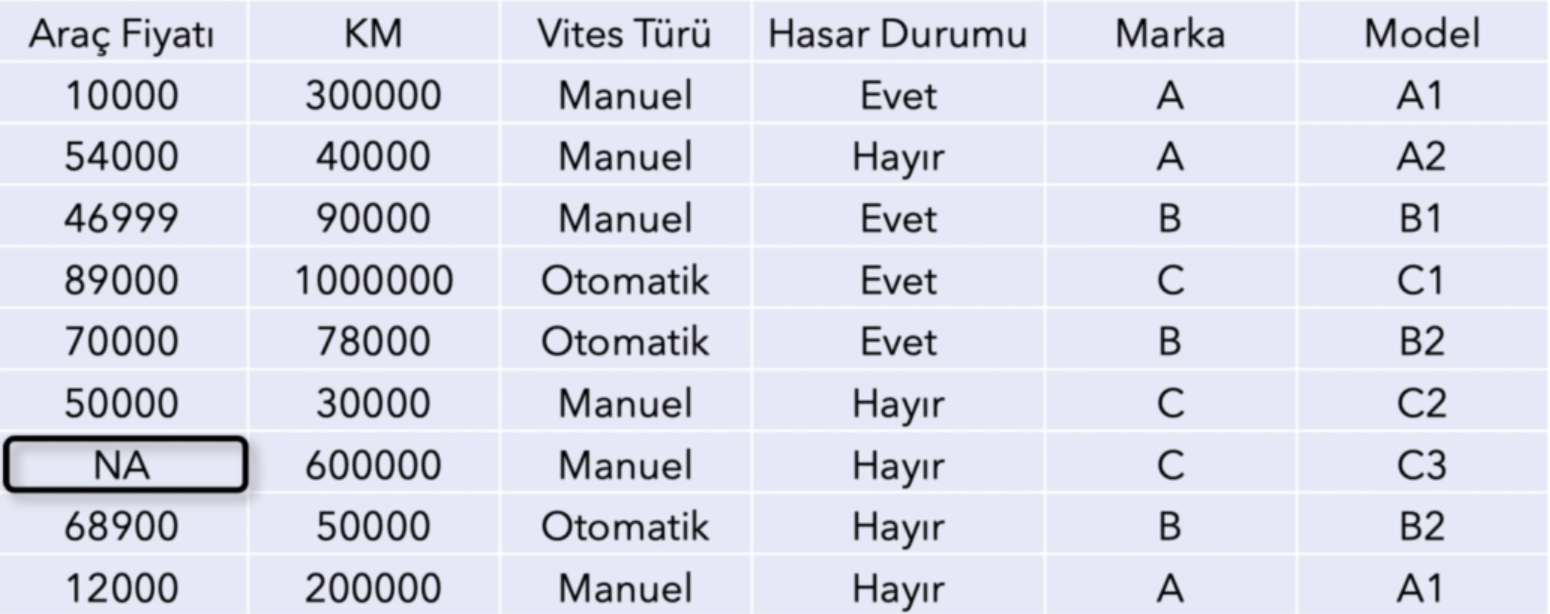

"Eksik değere sahip gözlemlerin veri setinden direkt çıkarılması ve rassallığının incelenmemesi yapılacak istatiksel çıkarımların, modelleme çalışmalarının güvenilirliğini düşürecektir." (Alpar,2011)

"Eksik gözlemlerin veri setinden direkt çıkartılabilmesi için veri setindeki eksikliğin bazı durumlarda kısmen bazı durumlarda tamamen rastlantısal olarak oluşmuş olması gerekmektedir. Eğer eksiklikler değişkenler ile ilişkili olarak ortaya çıkan yapısal problemler ile meydana gelmiş ise bu durumda yapılacak silme işlemleri ciddi yanlılıklara sebep olacaktır." (Tabachnick ve Fidell, 1996)

### Eksik Veriyi Silmenin Zararları

* Veri setindeki eksikliğin yapısal bir eksiklik olup olmadığının bilinmesi gerekir!
* NA her zaman eksiklik anlamına gelmez!
* Bilgi kaybı!


### Eksik Veri Türleri

* **Tümüyle Rastlantısal Kayıp:** Diğer değişkenlerden ya da yapısal bir problemden kaynaklanmayan tamamen rastgele oluşan gözlemler.
* **Rastlantısal Kayıp:** Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü
* **Rastlantısal Olmayan Kayıp:** Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü.

### Eksik Veri Rassallığının Testi

* _Görsel Teknikler_
* Bağımsız İki Örneklem T Testi
* Korelasyon Testi
* _Little'nin MCAR Testi_

## Eksik Veri Problemi Giderme
### Silme Yöntemleri
* Gözlem ya da değişken silme yöntemi
* Liste bazında silme yöntemi (Listwise Method)
* Çiftler bazında silme yöntemi (Pairwise Method)

### Değer Atama Yöntemleri
* Ortanca, ortalama, medyan
* En Benzer Birime Atama (Hot Deck)
* Dış Kaynaklı Atama

### Tahmine Dayalı Yöntemler
* Makine Öğrenmesi
* EM
* Çoklu Atama Yöntemleri

## **Eksik Veri Analizi**

### Hızlı Çözüm

In [2]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [74]:
df.isnull().sum() # herbir değişkendeki eksik değer sayısı

V1    2
V2    3
V3    2
dtype: int64

In [75]:
df.notnull().sum() # eksik olmayan değer sayısı

V1    7
V2    6
V3    7
dtype: int64

In [83]:
df[df.isnull().any(axis=1)] #en az 1 tane Na varsa getir

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [81]:
df[df.notnull().all(axis=1)]  #hepsi not null olanları getir.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [85]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Silme Yöntemi 

In [90]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [91]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Basit Değer Atama 

In [94]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [95]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [98]:
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Eksik Değerlerin Saptanması

In [3]:
# değişkenlerdeki tam değer sayısı
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [4]:
# değişkenlerdeki eksik değer sayısı
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [5]:
# verisetindeki toplam eksik değer sayısı
df.isnull().sum().sum()

7

In [7]:
# en az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [9]:
# tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## **Eksik Veri Yapısının Görselleştirilmesi**

In [10]:
!pip install missingno

In [11]:
import missingno as msno

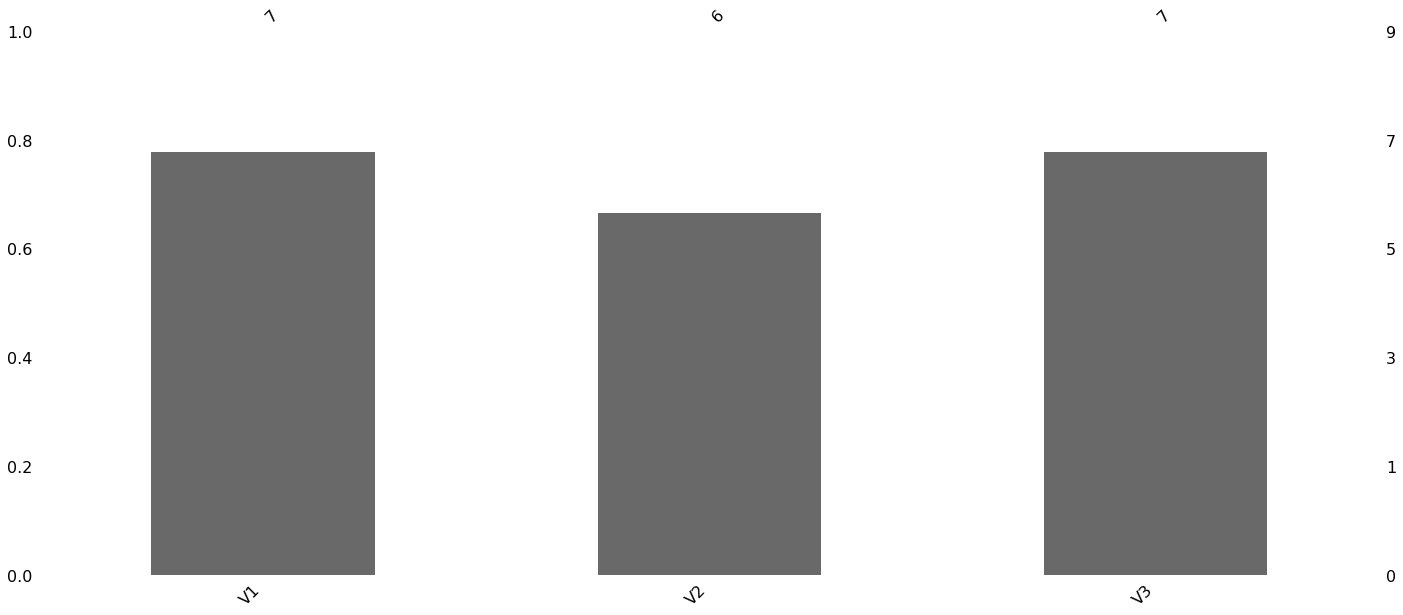

In [14]:
msno.bar(df);  #değişkenlerdeki eksikliği oransal olarak gösterir

Soldaki eksen yüzdesel olarak eksik değeri sağdaki eksik toplam veri sayısını gösterir. Üstteki eksen ise sayısal olarak eksik değeri gösterir.

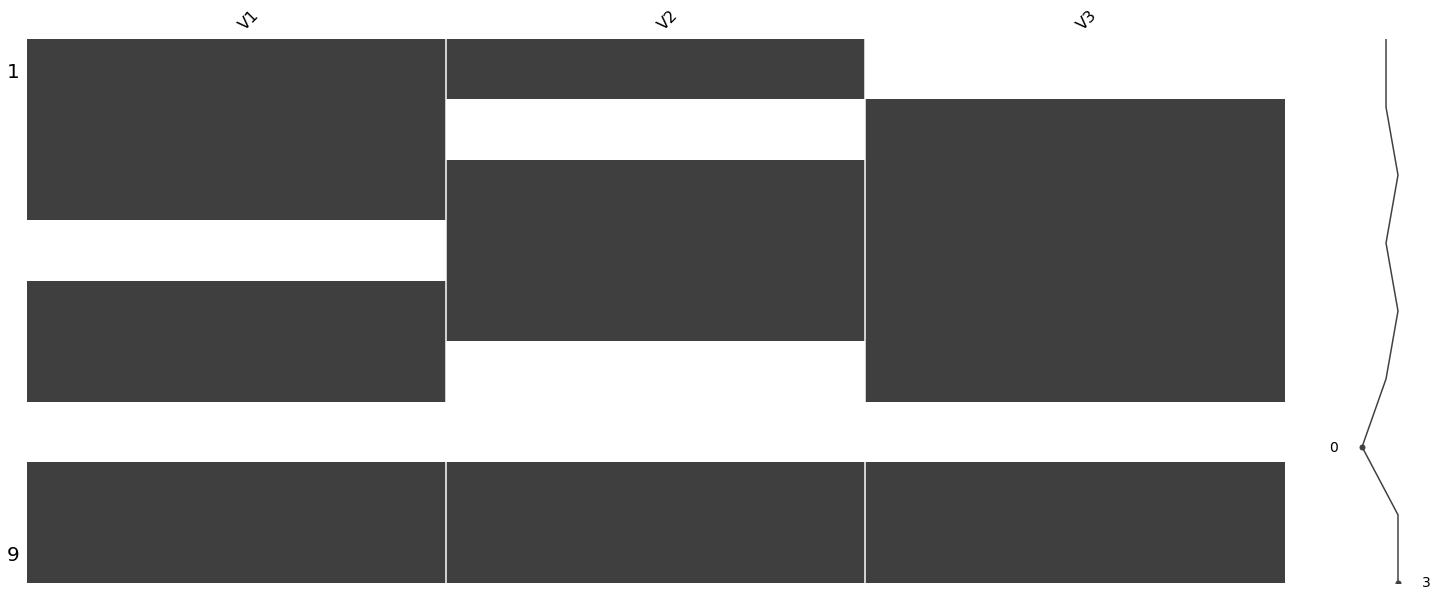

In [16]:
msno.matrix(df);  #eksik değerlerin rassallığını gösterir

X ekseni columns ı y ekseni gözlemleri ifade eder. ortadaki boşluklar da tablo mantığıyla eksik değerleri noktasal olarak gösterir. sağdaki eksen ise kaç tane dolu değer olduğunu gösterir 0 hiç yok 3 tane yani tamamı dolu demektir.

In [17]:
import seaborn as sns
df=sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [18]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

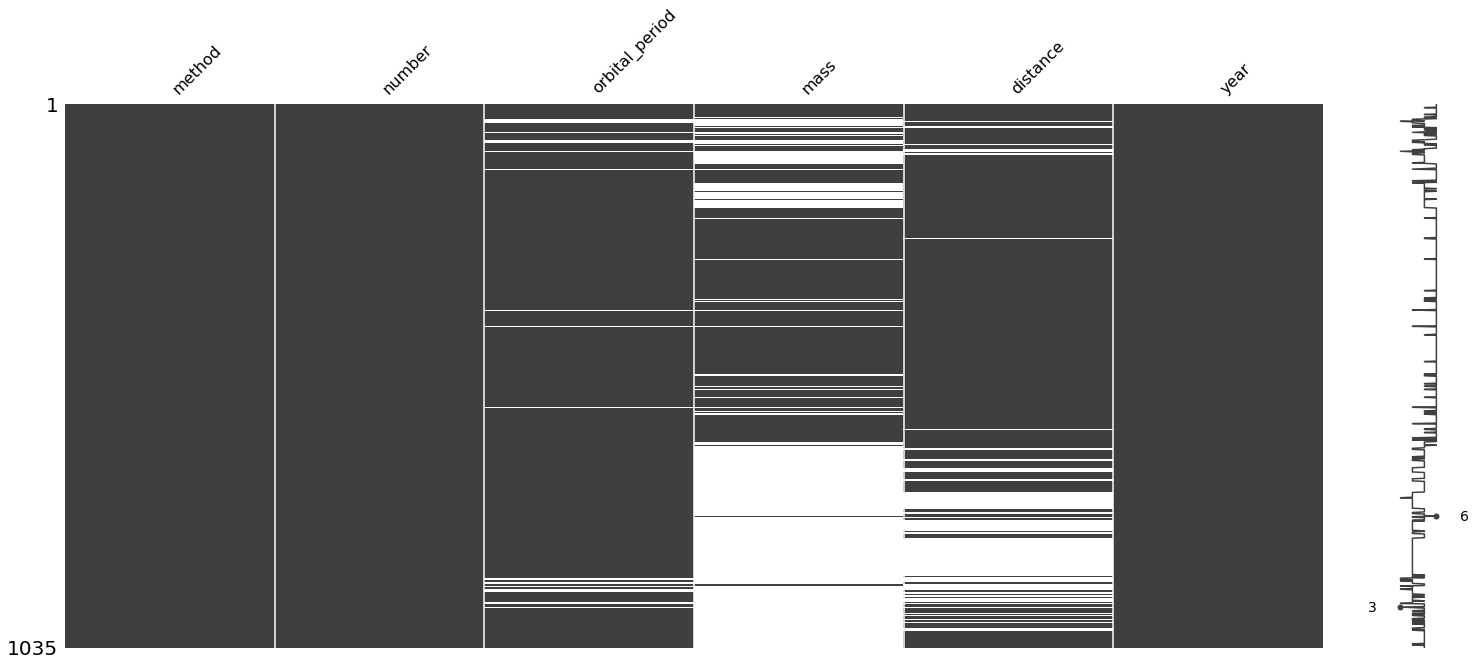

In [20]:
msno.matrix(df);

Her orbital_periodda eksiklik olduğunda mass'te eksiklik gözleniyor. Yani iki feature arasında gözle görülür bir bağımlılık var.

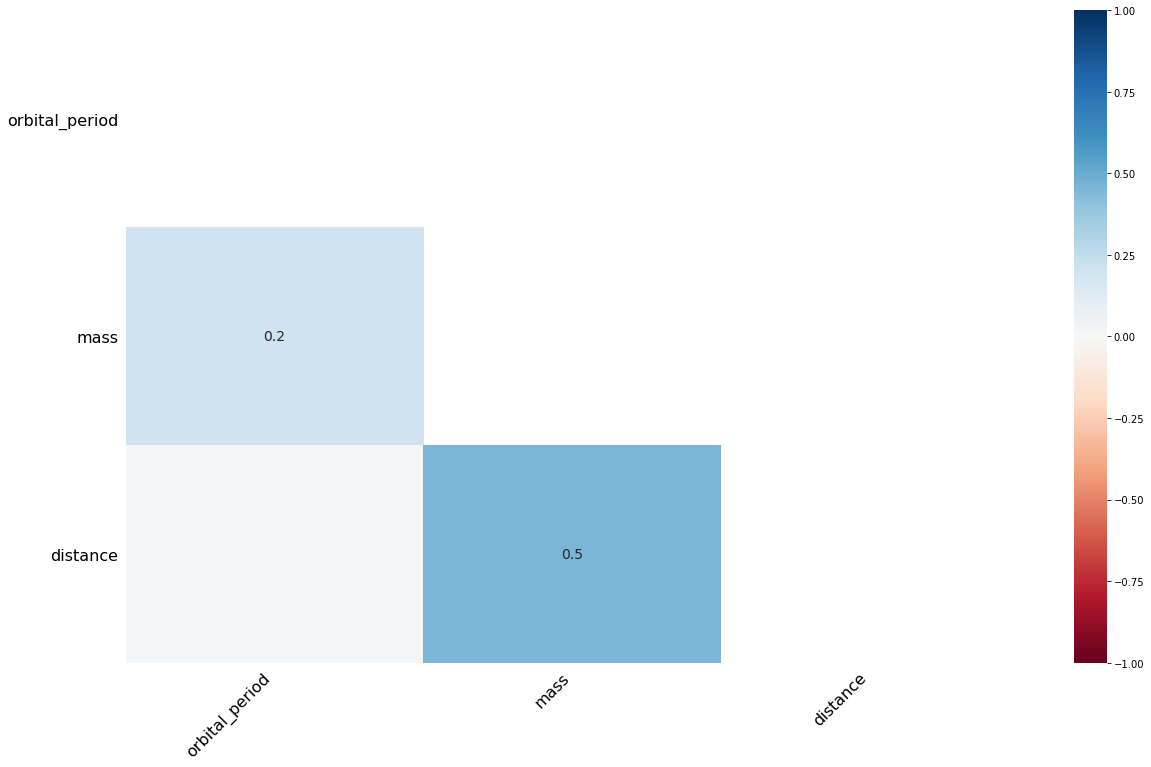

In [21]:
msno.heatmap(df);

mass değişkeni ile distance arasında nullity correlation vardır. yani yoklukları arasında %50 bi ilişki vardır.

### Silme Yöntemi

In [22]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [24]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [26]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [25]:
df.dropna(how = "all")  # hepsi aynı anda eksik ise sil

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [28]:
df.dropna(axis=1)  # en az bi tane NaN varsa o değişkeni sil

""
0
1
2
3
4
5
6
7
8


In [29]:
df.dropna(axis=1,how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [30]:
df["sil"] = np.nan

In [31]:
df

,V1,V2,V3,sil
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [33]:
df.dropna(axis=1 , how = "all", inplace = True)

In [34]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Basit Değer Atama

In [35]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [36]:
# Sayısal Değişkenlerde Atama

In [37]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [38]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [41]:
# tüm değişkenleri kendi ortalamalarıyla doldurma
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [43]:
# ikinci yol
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [44]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [45]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [46]:
# üçüncü yol

In [47]:
df.where(pd.notna(df),df.mean(),axis="columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


# **Kategorik Değişken Kırılımında Değer Atama**

In [48]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [50]:
#departmanlara göre maaş ortalaması
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [52]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

# **Kategorik Değişkenler için Eksik Değer Atama**

In [53]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


    (kategorik değişkenlerde mod ile doldurmak genelde tercih sebebidir.)

In [54]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

    (eksik olan değeri önceki veya sonraki değeri ile doldurabiliriz.)

In [57]:
df["departman"].fillna(method = "bfill")
#kendisinden sonraki değer ile doldurma

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [58]:
df["departman"].fillna(method ="ffill")
#kendisinden önceki değer ile doldurma

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

# **Tahmine Dayalı Değer Atama Yöntemleri**

In [1]:
import seaborn as sns
import missingno as msno
import numpy as np
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["int64","float64"])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [12]:
!pip install ycimpute

In [20]:
from ycimpute.imputer import knnimput

In [21]:
var_names = list(df)

In [22]:
n_df = np.array(df)

In [25]:
n_df[:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [27]:
dff = knnimput.KNN(k=4).complete(n_df) #k'ya en yakın komşu algoritmasında
#k'ya 4 değeri verildi

Imputing row 1/891 with 0 missing, elapsed time: 0.168
Imputing row 101/891 with 0 missing, elapsed time: 0.170
Imputing row 201/891 with 0 missing, elapsed time: 0.171
Imputing row 301/891 with 1 missing, elapsed time: 0.172
Imputing row 401/891 with 0 missing, elapsed time: 0.173
Imputing row 501/891 with 0 missing, elapsed time: 0.174
Imputing row 601/891 with 0 missing, elapsed time: 0.175
Imputing row 701/891 with 0 missing, elapsed time: 0.176
Imputing row 801/891 with 0 missing, elapsed time: 0.177


In [28]:
type(dff)

numpy.ndarray

In [30]:
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [32]:
type(dff)

pandas.core.frame.DataFrame

In [33]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [45]:
# EM Algoritması

In [46]:
import seaborn as sns
import missingno as msno
import numpy as np
from ycimpute.imputer import EM
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["int64","float64"])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [47]:
var_names = list(df)

In [48]:
n_df = np.array(df)

In [49]:
dff = EM().complete(n_df)

In [50]:
dff = pd.DataFrame(dff, columns = var_names)

In [52]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

## Değişken (Veri) Standardizasyonu

Veri standardizasyonunda verinin ana yapısı bozulmaz sadece bir standarta indirgenir. Yani bir veri seti küçükten büyüğe sıralandığında 10 değeri 80. sırada ise standardize edildikten sonra 10 değeri 0 ile 1 aralığında bi değer olacaktır ancak yeniden küçükten büyüğe sıralandığında yine 80. sırada olacaktır. Yani değişkenin değeri değişebilir ancak taşıdığı anlam değişmez.

In [53]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


**Standardizasyon**

In [54]:
from sklearn import preprocessing

In [60]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [59]:
df.mean()

V1    4.4
V2    7.8
V3    8.6
dtype: float64

**Normalizasyon** 

In [61]:
preprocessing.normalize(df)   # 0 ile 1 arasına dönüştürmek

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

**Min-Max Dönüşümü**

In [63]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))

In [65]:
scaler.fit_transform(df)  # 10 ile 20 arasına dönüştürmek

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

## Değişken Dönüşümleri

In [66]:
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**0-1 Dönüşümü**

In [67]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [68]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [70]:
df["yeni_sex"] = lbe.fit_transform(df["sex"])

In [71]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


**1 ve Diğerleri (O) Dönüşümü**

In [72]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [75]:
#day featurenı str ye çevir ve 
#değer eğer Sun ise 1 yap değilse 0

In [73]:
df["yeni_day"] = np.where(df["day"].str.contains("Sun"),1,0)

In [74]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


**Çok Sınıflı Dönüşüm**

In [76]:
# 4 farklı sınıfı 0-1-2-3-4'e dönüştürülebilir.

In [77]:
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

    Dikkat! Kategorik değişkenlerin bağımlı değişkene etkisi nümerik olarak değişecektir. Çünkü kategorik veriler numerik verilere dönüştürüldü. Bu durumdan kurtulmak için One-Hot Dönüşümü uygulanır.

**One-Hot Dönüşümü ve Dummy Değişken Tuzağı**

In [78]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [81]:
df_one_hot = pd.get_dummies(df, columns=["sex"],prefix= ["sex"])

In [82]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


Sınıf sayısı kadar yeni değişken oluştu. Ve yeni değişkenleri 0-1 e dönüştürdü. Bir değişkeni ifade eden başka bi değişken ifade edilebiliyorsa ***dummy değişken tuzağı*** var demektir. Aynı şeyi iki değişken ile ifade etmek de denilebilir.

In [85]:
df_one_hot = pd.get_dummies(df, columns=["day"],prefix= ["day"]).head()

In [86]:
df_one_hot

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1


      One-Hot dönüşümünde kategorik değişkenin bağımlı değişkene etkisi aynı kalacağı için tercih edilir.
      İki sınıflı kategorik verilerde bir değişken diğer değişken üzerinedn tanımlanabileceği için dummy değişken tuzağına düşme durumu söz konusudur.